[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/03.classification/classification.ipynb)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

!pip install regressors
from regressors import stats # To print information about 
                            # regression.
        
from sklearn.pipeline import make_pipeline
        
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler


# May not work in the old versions of scikit-learn
from sklearn.metrics import plot_confusion_matrix  

from imblearn.over_sampling import SMOTE

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12374 sha256=8b6ee99e98cba4e7c8ad07f69d35c5a06517a9eda85e5b02bcba3adab064da8b
  Stored in directory: /root/.cache/pip/wheels/b2/89/fc/7867f77234d0033395f7ad9814f245b337139acaa06b085aa2
Successfully built regressors


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
savefigures=True

Download the dataset from my github

In [3]:
dataset_to_use = 'A'
mydatasets_folder = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/"
filename = "df."+ dataset_to_use+"_2.csv"
complete_name = mydatasets_folder+filename
!wget $complete_name


--2020-03-03 14:44:41--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315832 (308K) [text/plain]
Saving to: ‘df.A_2.csv’

df.A_2.csv          100%[===================>] 308.43K  --.-KB/s    in 0.06s   

2020-03-03 14:44:42 (5.45 MB/s) - ‘df.A_2.csv’ saved [315832/315832]



In [0]:
df = pd.read_csv(filename)

In [7]:
print("The resolutions found in our dataset are")
set(df['label_num'].values)

The resolutions found in our dataset are


{144, 240, 360, 480, 720, 1080}

How many samples in each class?

In [8]:
df['label_num'].value_counts()

720     92
480     63
1080    55
360     33
144     27
240     22
Name: label_num, dtype: int64

We want to infer whether the resolution of the transmitted video is low (<=240) or high (>=360)

In [9]:
high_res = df['label_num']>=720
high_res.head()

0    False
1    False
2     True
3    False
4    False
Name: label_num, dtype: bool

Convert into `int`

In [10]:
high_res = high_res.astype(np.int)
high_res.head()

0    0
1    0
2    1
3    0
4    0
Name: label_num, dtype: int64

Let's add it to the dataframe

In [0]:
df['high_res'] = high_res

# Simple binary classification

In [0]:
df_train,df_test = train_test_split(df, test_size=0.2, random_state=1)

columns = ['BytesReceived0', 'PacketsSent0']

X_train = df_train[columns]
X_test = df_test[columns]
y_train = df_train['high_res']
y_test = df_test['high_res']

Logistic regression adds by default a regularization with weight `C`>0.
Let's try with no regularization first

In [13]:
model = LogisticRegression(C=1e-9)
model.fit(X_train, y_train)

LogisticRegression(C=1e-09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.42748436, 0.57251564],
       [0.45211939, 0.54788061],
       [0.40498133, 0.59501867],
       [0.42705787, 0.57294213],
       [0.46802996, 0.53197004],
       [0.5       , 0.5       ],
       [0.45635394, 0.54364606],
       [0.43421147, 0.56578853],
       [0.44159467, 0.55840533],
       [0.49573093, 0.50426907],
       [0.44854129, 0.55145871],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.44266093, 0.55733907],
       [0.48292983, 0.51707017],
       [0.48932869, 0.51067131],
       [0.39792715, 0.60207285],
       [0.47973237, 0.52026763],
       [0.45211892, 0.54788108],
       [0.5       , 0.5       ],
       [0.43329908, 0.56670092],
       [0.47760179, 0.52239821],
       [0.47653727, 0.52346273],
       [0.46802549, 0.53197451],
       [0.40716638, 0.59283362],
       [0.48719528, 0.51280472],
       [0.5       , 0.5       ],
       [0.42167345, 0.57832655],
       [0.5       , 0.5       ],
       [0.42370421, 0.57629579],
       [0.

`y_pred_proba` has two values:
* $\mathbb{P}(\mathbf{x}\notin \text{class }1)$
* $\mathbb{P}(\mathbf{x}\in \text{class }1)$

They sum up to 1.

The actual prediction is

In [15]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Let's have a look at the predictions vs. the true value

In [16]:
pd.DataFrame({'true':y_test, 'pred':y_pred })

,true,pred
132,0,1
267,0,1
266,1,1
62,1,1
110,1,1
27,1,0
91,0,1
189,1,1
85,1,1
164,1,1


Let's evaluate the goodness of our classifier

In [17]:
accuracy_score(y_test, y_pred)

0.4406779661016949

Very bad. Our classifier is just a random guess!

Let' first normalize

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [0]:
model = LogisticRegression(C=1)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [20]:
accuracy_score(y_pred, y_test)

0.7627118644067796

Better.

## Decision boundary

Let's plot our dataset

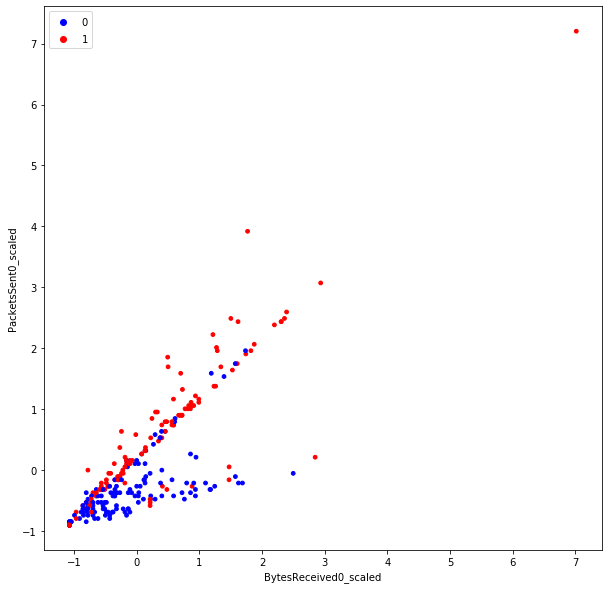

In [21]:
fig, ax = plt.subplots(figsize=(10,10) )

X = df[columns]

X_scaled = scaler.transform(X)

BytesReceived0_scaled = X_scaled[:,0]
PacketsSent0_scaled = X_scaled[:,1]

scatter = ax.scatter(BytesReceived0_scaled, PacketsSent0_scaled,
          c=df['high_res'], cmap='bwr', s=14)


ax.set(xlabel="BytesReceived0_scaled", ylabel="PacketsSent0_scaled" )

# Add the legend associated to the different colors
legend = ax.legend(*scatter.legend_elements() )

Let's plot the decision boundary, i.e. the surface that separates the areas of the space in which prediction is `1` from the ones in which preciction is `0`.

In [22]:
# This code is not important to understand

### First, create a grid of points
horiz_min = min(BytesReceived0_scaled)
vert_min = min(PacketsSent0_scaled)
horiz_max = max(BytesReceived0_scaled)
vert_max = max(PacketsSent0_scaled)

grid_step=0.1

horiz_part, vert_part = \
    np.mgrid[horiz_min:horiz_max:grid_step, 
             vert_min:vert_max:grid_step]
grid = np.c_[horiz_part.ravel(), vert_part.ravel()]
print ("The grid is ", grid)
grid_probability = model.predict_proba(grid)[:,1]
print("The probability associated to each point is", grid_probability)
grid_probability = grid_probability.reshape(horiz_part.shape)
print("After reshaping", grid_probability)

The grid is  [[-1.07158236 -0.89800608]
 [-1.07158236 -0.79800608]
 [-1.07158236 -0.69800608]
 ...
 [ 6.92841764  7.00199392]
 [ 6.92841764  7.10199392]
 [ 6.92841764  7.20199392]]
The probability associated to each point is [0.4088402  0.45242172 0.49674521 ... 0.99567488 0.9963771  0.99696566]
After reshaping [[4.08840204e-01 4.52421722e-01 4.96745207e-01 ... 9.99998858e-01
  9.99999044e-01 9.99999200e-01]
 [3.84187193e-01 4.27039124e-01 4.71014912e-01 ... 9.99998734e-01
  9.99998941e-01 9.99999113e-01]
 [3.60115184e-01 4.02035033e-01 4.45437734e-01 ... 9.99998597e-01
  9.99998826e-01 9.99999017e-01]
 ...
 [2.23304606e-04 2.66764068e-04 3.18678899e-04 ... 9.96477597e-01
  9.97049879e-01 9.97529413e-01]
 [2.01443212e-04 2.40649042e-04 2.87483102e-04 ... 9.96096740e-01
  9.96730696e-01 9.97261970e-01]
 [1.81721647e-04 2.17090007e-04 2.59340300e-04 ... 9.95674881e-01
  9.96377105e-01 9.96965664e-01]]


In [23]:
### Now, add to the scatterplot the decision boundaruy

ax.contour(horiz_part, vert_part, grid_probability, [0.5])
fig

if savefigures:
  
  fig.savefig('img/linear-class.pdf')


FileNotFoundError: ignored

Some ideas to improve this model?
<details>
<summary>
CLICK
</summary>
    
* Find the regularization weight via grid search
* Since data are "squashed" towards low value => log-transformation
* Find the best combination of features manually or via Recursive Feature Elimination
    
    
</details>

# Multinomial Logistic Regression

Let' create three catagories: 

* 0: low resolution
* 1: mid resolution
* 2: high resolution

In [0]:
threshold1=240
threshold2=480

res = [0 if d < threshold1 
       else 1 if threshold1 <= d < threshold2
       else 2
      for d in df['label_num'] 
      ]

df['res'] = res


Let's create a pipeline to scale (important when we regularize) and then apply Multinomial Regression

In [0]:
def MyMultinomialRegression(C=1e-9):
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(multi_class="multinomial", solver="lbfgs", C=C)
    )

# lbfgs is an improved version of gradient descent:
# https://en.wikipedia.org/wiki/Limited-memory_BFGS

Now that we added another column to `df`, we need to divide the new `df` into train and test set again.

Note: if we use the same seed (`random_state`) as before, the same samples as before will fall in the train and test set.

In [0]:
df_train, df_test = train_test_split(df,test_size=0.2, random_state=1)

y_train = df_train['res']
y_test = df_test['res']

model = MyMultinomialRegression(C=1)
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2])

In [0]:
accuracy_score(y_pred, y_test)

0.7288135593220338

Accuracy may be a misleading.

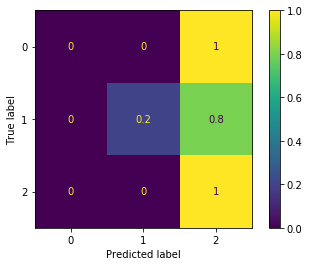

In [0]:
from sklearn.utils.multiclass import unique_labels

np.set_printoptions(precision=2) # To print just 2 decimal numbers

plot_confusion_matrix(model, X_test, y_test, normalize='true')

plt.savefig('img/bad-confusion.pdf')
plt.show()

# Class imbalance

When a class is prevalent, the model adapts to that class: the result is a very bad classifier with a high accuracy. 

For instance, a silly classifier that always predicts the prevalent class would give good accuracy.

In [0]:
y_pred = [2 for i in range(len(y_test))]
accuracy_score(y_pred, y_test)

0.6949152542372882

Our dataset is quite umbalanced

In [0]:
df['res'].value_counts()

2    210
1     55
0     27
Name: res, dtype: int64

Simple idea: In the training set, we can create synthetic samples  of the small classes, in order for all the classes to be of the same size. This is done by Synthetic Minority Over-sampling TEchnique (SMOTE):

N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 321-357, 2002.

(**~10000 citations!**)

Synthetic samples are generated via 5-Nearest Neighbors (we'll see it later)

In [0]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train)
pd.value_counts(y_train_balanced)

/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/home/araldo/.conda/envs/my_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2    169
1    169
0    169
dtype: int64

We train on the oversampled traing dataset and we test on the original test set.

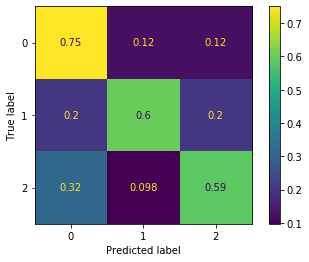

In [0]:
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test, normalize='true')
plt.savefig('img/mmh-confusion.pdf')

In [0]:
accuracy_score(y_pred, y_test)

0.6101694915254238

We improved a bit, still the model is not excellent

Some ideas to improve it?
<details>
<summary>
CLICK
</summary>
    
* Find the regularization weight via grid search
* Try to transform the input
* Find the best combination of features manually or via Recursive Feature Elimination
    
    
</details>

A classification report summarizes for us all the important features

In [0]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.29      0.75      0.41         8
           1       0.55      0.60      0.57        10
           2       0.89      0.59      0.71        41

    accuracy                           0.61        59
   macro avg       0.57      0.65      0.56        59
weighted avg       0.75      0.61      0.64        59



# Grid search

Let's find the best regularization weight `C` via grid search. Let's first check what is the correct name of the parameter `C` to which we need to refer.

In [0]:
GridSearchCV(MyMultinomialRegression(), [] ).get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__standardscaler', 'estimator__logisticregression', 'estimator__standardscaler__copy', 'estimator__standardscaler__with_mean', 'estimator__standardscaler__with_std', 'estimator__logisticregression__C', 'estimator__logisticregression__class_weight', 'estimator__logisticregression__dual', 'estimator__logisticregression__fit_intercept', 'estimator__logisticregression__intercept_scaling', 'estimator__logisticregression__l1_ratio', 'estimator__logisticregression__max_iter', 'estimator__logisticregression__multi_class', 'estimator__logisticregression__n_jobs', 'estimator__logisticregression__penalty', 'estimator__logisticregression__random_state', 'estimator__logisticregression__solver', 'estimator__logisticregression__tol', 'estimator__logisticregression__verbose', 'estimator__logisticregression__warm_start', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_tr

In [0]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=5)

parameters_to_test = [{ 'logisticregression__C': [1e-9, 1e-3, 0.01, 0.1, 1, 10, 100, 1000, 10000] }]

# The different scoring metrics available are in:
#     https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid = GridSearchCV(MyMultinomialRegression(), parameters_to_test, cv=k_fold, 
                    scoring='f1_macro')

In [0]:
grid.fit(X_train_balanced, y_train_balanced)
print("The best regularization weigth is ", grid.best_params_)

The best regularization weigth is  {'logisticregression__C': 0.1}


              precision    recall  f1-score   support

           0       0.30      0.88      0.45         8
           1       0.60      0.60      0.60        10
           2       0.88      0.56      0.69        41

    accuracy                           0.61        59
   macro avg       0.60      0.68      0.58        59
weighted avg       0.76      0.61      0.64        59



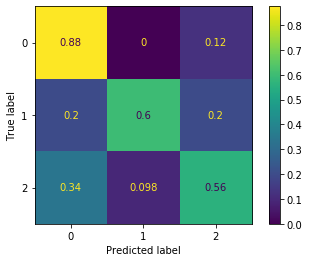

In [0]:
model = grid.best_estimator_
model.fit(X_train_balanced, y_train_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, normalize='true')